# Big Five Personality Test - 1M Answers to 50 personality items, and technical information

## Information about this notebook
### Source
This notebook aims to explore, gain insights, and solve the problems related to the data in the following source:
- https://www.kaggle.com/tunguz/big-five-personality-test

### References
The content of this notebook is based on knowledge gained from the following resources:
- https://www.kaggle.com/akdagmelih/five-personality-clusters-k-means
- https://www.kaggle.com/kautumn06/yellowbrick-clustering-evaluation-examples

### Data
This notebook depends on the following data files:
- data-final.csv

### Imports
This notebook depends on the following libraries:

In [123]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

### Settings
This notebook uses the following settings:

In [124]:
# Block warnings
warnings.filterwarnings('ignore')

# Show math plots inline
%matplotlib inline

### Status
- The content of this notebook mainly follows the lines of the reference given above.

## Table of Content
- <a href='#intro'>1. Introduction</a>
- <a href='#data'>2. The Data</a>
- <a href='#res_tech'>3. Research Techniques</a>
- <a href='#eda'>4. Exploratory Data Analysis</a>

<a id='intro'></a>
## 1. Introduction

From [Wikipedia](https://en.wikipedia.org/wiki/Big_Five_personality_traits):

In psychological trait theory, the Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a suggested taxonomy, or grouping, for personality traits, developed from the 1980s onwards. When factor analysis (a statistical technique) is applied to personality survey data, some words used to describe aspects of personality are often applied to the same person. For example, someone described as conscientious is more likely to be described as "always prepared" rather than "messy". This theory is based therefore on semantic associations between words and not on neuropsychological experiments. This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche.

The theory identifies five factors:
- **openness to experience** (*inventive/curious vs. consistent/cautious*)
- **conscientiousness** (*efficient/organized vs. extravagant/careless*)
- **extraversion** (*outgoing/energetic vs. solitary/reserved*)
- **agreeableness** (*friendly/compassionate vs. challenging/callous*)
- **neuroticism** (*sensitive/nervous vs. resilient/confident*)

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/0/0c/Wiki-grafik_peats-de_big_five_ENG.png" title="Big Five personality traits" width="500"/>
</center>

The five factors are represented using the acronyms OCEAN or CANOE. Beneath each proposed global factor, there are a number of correlated and more specific primary factors. For example, extraversion is typically associated with qualities such as gregariousness, assertiveness, excitement-seeking, warmth, activity, and positive emotions.

Family life and the way someone was raised will affect these traits. Twin studies and other research have shown that about half of the variation between individuals results from their genetics and half from their environments. Researchers have found conscientiousness, extraversion, openness to experience, and neuroticism to be relatively stable from childhood through adulthood.

<a id='data'></a>
## 2. The Data

This data was collected (2016-2018) through an interactive on-line personality test. The personality test was constructed with the "Big-Five Factor Markers" from the IPIP. https://ipip.ori.org/newBigFive5broadKey.html Participants were informed that their responses would be recorded and used for research at the beginning of the test, and asked to confirm their consent at the end of the test.

The following items were presented on one page and each was rated on a five point scale using radio buttons. The order on page was was EXT1, AGR1, CSN1, EST1, OPN1, EXT2, etc. The scale was labeled 1=Disagree, 3=Neutral, 5=Agree
- EXT1: I am the life of the party.
- EXT2: I don't talk a lot.
- EXT3: I feel comfortable around people.
- EXT4: I keep in the background.
- EXT5: I start conversations.
- EXT6: I have little to say.
- EXT7: I talk to a lot of different people at parties.
- EXT8: I don't like to draw attention to myself.
- EXT9: I don't mind being the center of attention.
- EXT10: I am quiet around strangers.
- EST1: I get stressed out easily.
- EST2: I am relaxed most of the time.
- EST3: I worry about things.
- EST4: I seldom feel blue.
- EST5: I am easily disturbed.
- EST6: I get upset easily.
- EST7: I change my mood a lot.
- EST8: I have frequent mood swings.
- EST9: I get irritated easily.
- EST10: I often feel blue.
- AGR1: I feel little concern for others.
- AGR2: I am interested in people.
- AGR3: I insult people.
- AGR4: I sympathize with others' feelings.
- AGR5: I am not interested in other people's problems.
- AGR6: I have a soft heart.
- AGR7: I am not really interested in others.
- AGR8: I take time out for others.
- AGR9: I feel others' emotions.
- AGR10: I make people feel at ease.
- CSN1: I am always prepared.
- CSN2: I leave my belongings around.
- CSN3: I pay attention to details.
- CSN4: I make a mess of things.
- CSN5: I get chores done right away.
- CSN6: I often forget to put things back in their proper place.
- CSN7: I like order.
- CSN8: I shirk my duties.
- CSN9: I follow a schedule.
- CSN10: I am exacting in my work.
- OPN1: I have a rich vocabulary.
- OPN2: I have difficulty understanding abstract ideas.
- OPN3: I have a vivid imagination.
- OPN4: I am not interested in abstract ideas.
- OPN5: I have excellent ideas.
- OPN6: I do not have a good imagination.
- OPN7: I am quick to understand things.
- OPN8: I use difficult words.
- OPN9: I spend time reflecting on things.
- OPN10: I am full of ideas.

The time spent on each question is also recorded in milliseconds. These are the variables ending in \_E. This was calculated by taking the time when the button for the question was clicked minus the time of the most recent other button click.

- dateload: The timestamp when the survey was started.
- screenw: The width the of user's screen in pixels
- screenh: The height of the user's screen in pixels
- introelapse: The time in seconds spent on the landing / intro page
- testelapse: The time in seconds spent on the page with the survey questions
- endelapse: The time in seconds spent on the finalization page (where the user was asked to indicate if they has answered accurately and their answers could be stored and used for research. Again: this dataset only includes users who answered "Yes" to this question, users were free to answer no and could still view their results either way)
- IPC: The number of records from the user's IP address in the dataset. For max cleanliness, only use records where this value is 1. High values can be because of shared networks (e.g. entire universities) or multiple submissions
- country: The country, determined by technical information (NOT ASKED AS A QUESTION)
- lat_appx_lots_of_err: approximate latitude of user. determined by technical information, THIS IS NOT VERY ACCURATE. Read the article "How an internet mapping glitch turned a random Kansas farm into a digital hell" https://splinternews.com/how-an-internet-mapping-glitch-turned-a-random-kansas-f-1793856052 to learn about the perils of relying on this information
- long_appx_lots_of_err: approximate longitude of user

<a id='res_tech'></a>
## 3. Research Techniques

Many different techniques can be used to answer many questions, e.g.

- **Clustering**: Given the music preferences, do people make up any clusters of similar behavior?
- **(Multivariate) Outlier detection**: Small number of participants often cheats and randomly answers the questions. Can you identify them? Hint: Local outlier factor may help.
- **Missing values analysis**: Are there any patterns in missing responses? What is the optimal way of imputing the values in surveys?

<a id='eda'></a>
## 4. Exploratory Data Analysis

We start off by importing and diplaying some basic information about the data.

In [111]:
# Load data
df = pd.read_csv('data-final.csv', sep='\t')

In [112]:
# Describe data
print('Dataset dimenionality: {}'.format(df.shape))
print('Dataset has missing values: {}'.format(df.isnull().values.any()))
print('Dataframe preview:')
df.head()

Dataset dimenionality: (1015341, 110)
Dataset has missing values: True
Dataframe preview:


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


As described in section <a href='#data'>2</a>, we have the following categories in the questionaire:

In [113]:
ext = ['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']
est = ['EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8', 'EST9', 'EST10']
agr = ['AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10']
csn = ['CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10']
opn = ['OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10']

ext_time = ['EXT1_E', 'EXT2_E', 'EXT3_E', 'EXT4_E', 'EXT5_E', 'EXT6_E', 'EXT7_E', 'EXT8_E', 'EXT9_E', 'EXT10_E']
est_time = ['EST1_E', 'EST2_E', 'EST3_E', 'EST4_E', 'EST5_E', 'EST6_E', 'EST7_E', 'EST8_E', 'EST9_E', 'EST10_E']
agr_time = ['AGR1_E', 'AGR2_E', 'AGR3_E', 'AGR4_E', 'AGR5_E', 'AGR6_E', 'AGR7_E', 'AGR8_E', 'AGR9_E', 'AGR10_E']
csn_time = ['CSN1_E', 'CSN2_E', 'CSN3_E', 'CSN4_E', 'CSN5_E', 'CSN6_E', 'CSN7_E', 'CSN8_E', 'CSN9_E', 'CSN10_E']
opn_time = ['OPN1_E', 'OPN2_E', 'OPN3_E', 'OPN4_E', 'OPN5_E', 'OPN6_E', 'OPN7_E', 'OPN8_E', 'OPN9_E', 'OPN10_E']


ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

other = ['dateload', 'screenw', 'screenh', 'introelapse', 'testelapse', 'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err']

### 4.1. Data Cleaning

We noted above that the dataset has missing values. The easiest way to handle this issue, is to just drop the records with missing values. However, the cost of this precedure leads to a smaller dataset than we started with. In our case, if we drop the entries with missing values we loose

In [114]:
print('{:.2f}% of the data'.format(100*(1 - len(df.dropna())/len(df))))

0.32% of the data


Since this is such a small portion of the dataset, we might as well just drop the entries with missing values.

In [115]:
# Remove entries with missing values
df.dropna(inplace=True)

We now have:

In [116]:
print('Dataset dimenionality: {}'.format(df.shape))

Dataset dimenionality: (1012050, 110)


### 4.2. Data Visualization

Being an international test, we like to see where our respondents come from.

Text(0, 0.5, 'Participants')

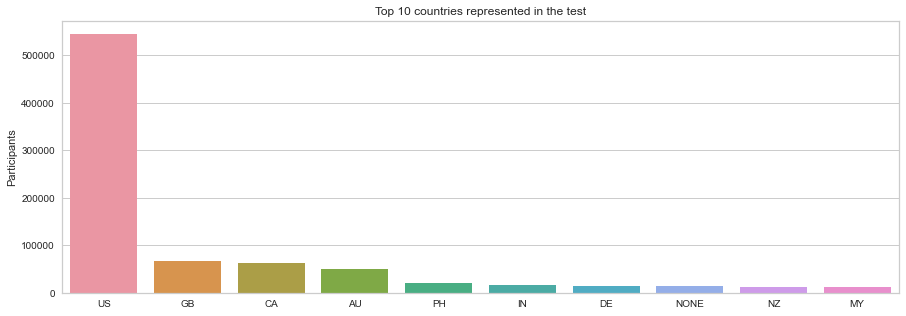

In [117]:
ser_country_top10 = df.country.value_counts().head(10) # Sorted series
plt.figure(figsize=(15,5))
sns.barplot(ser_country_top10.index, ser_country_top10.values)
plt.title('Top 10 countries represented in the test')
plt.ylabel('Participants')

We have the following distribution of answers to the questions:

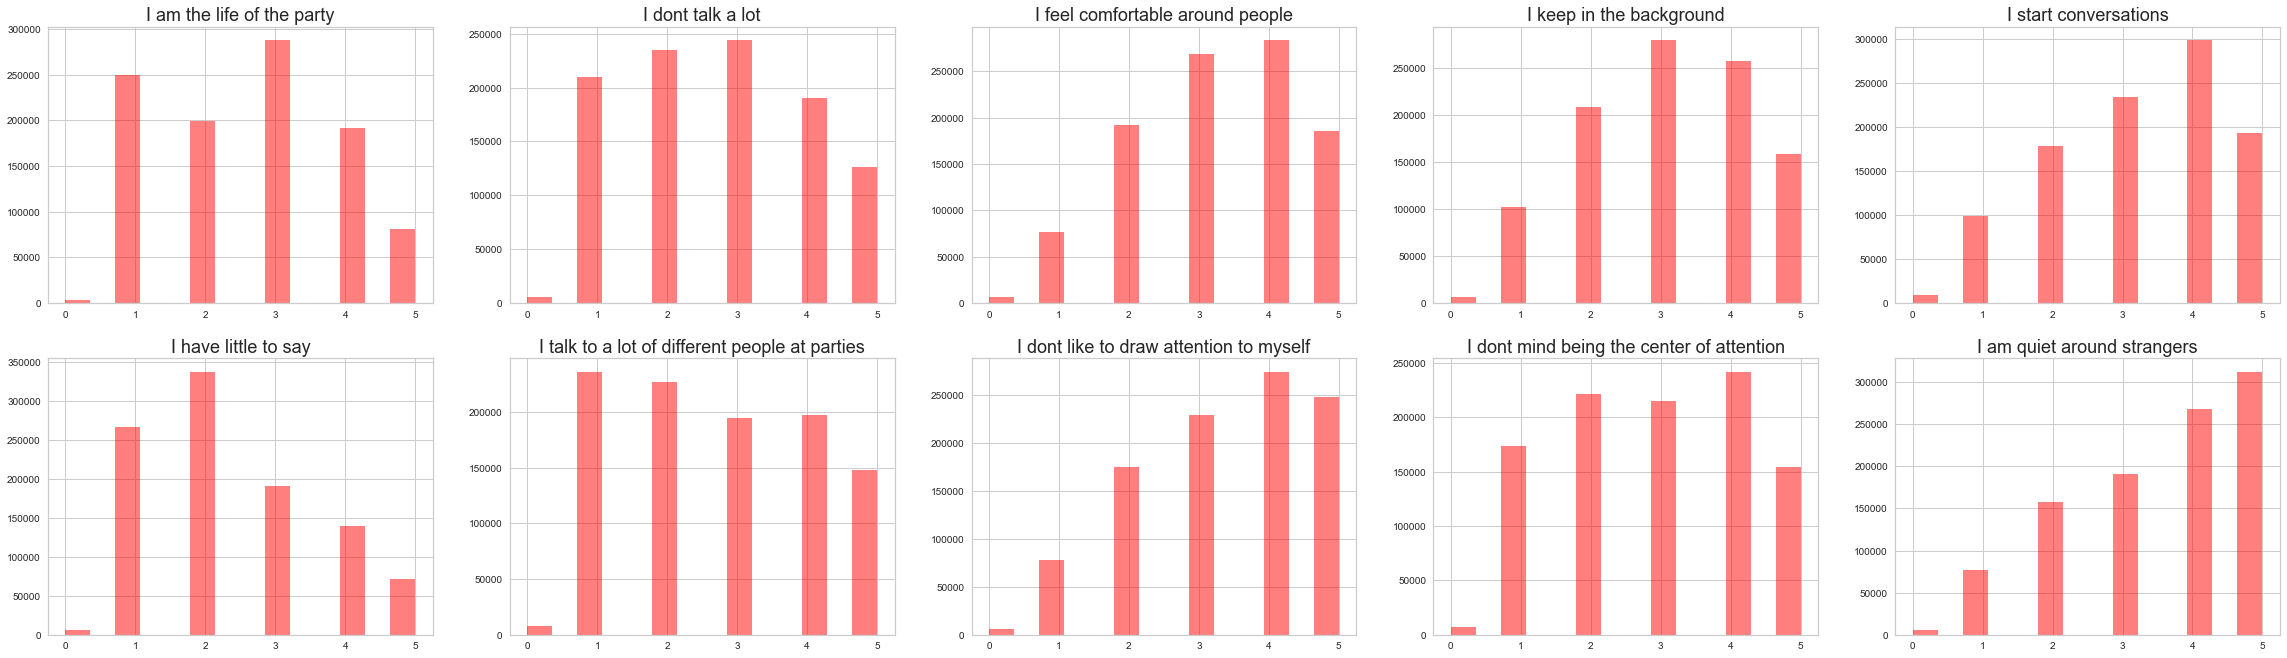

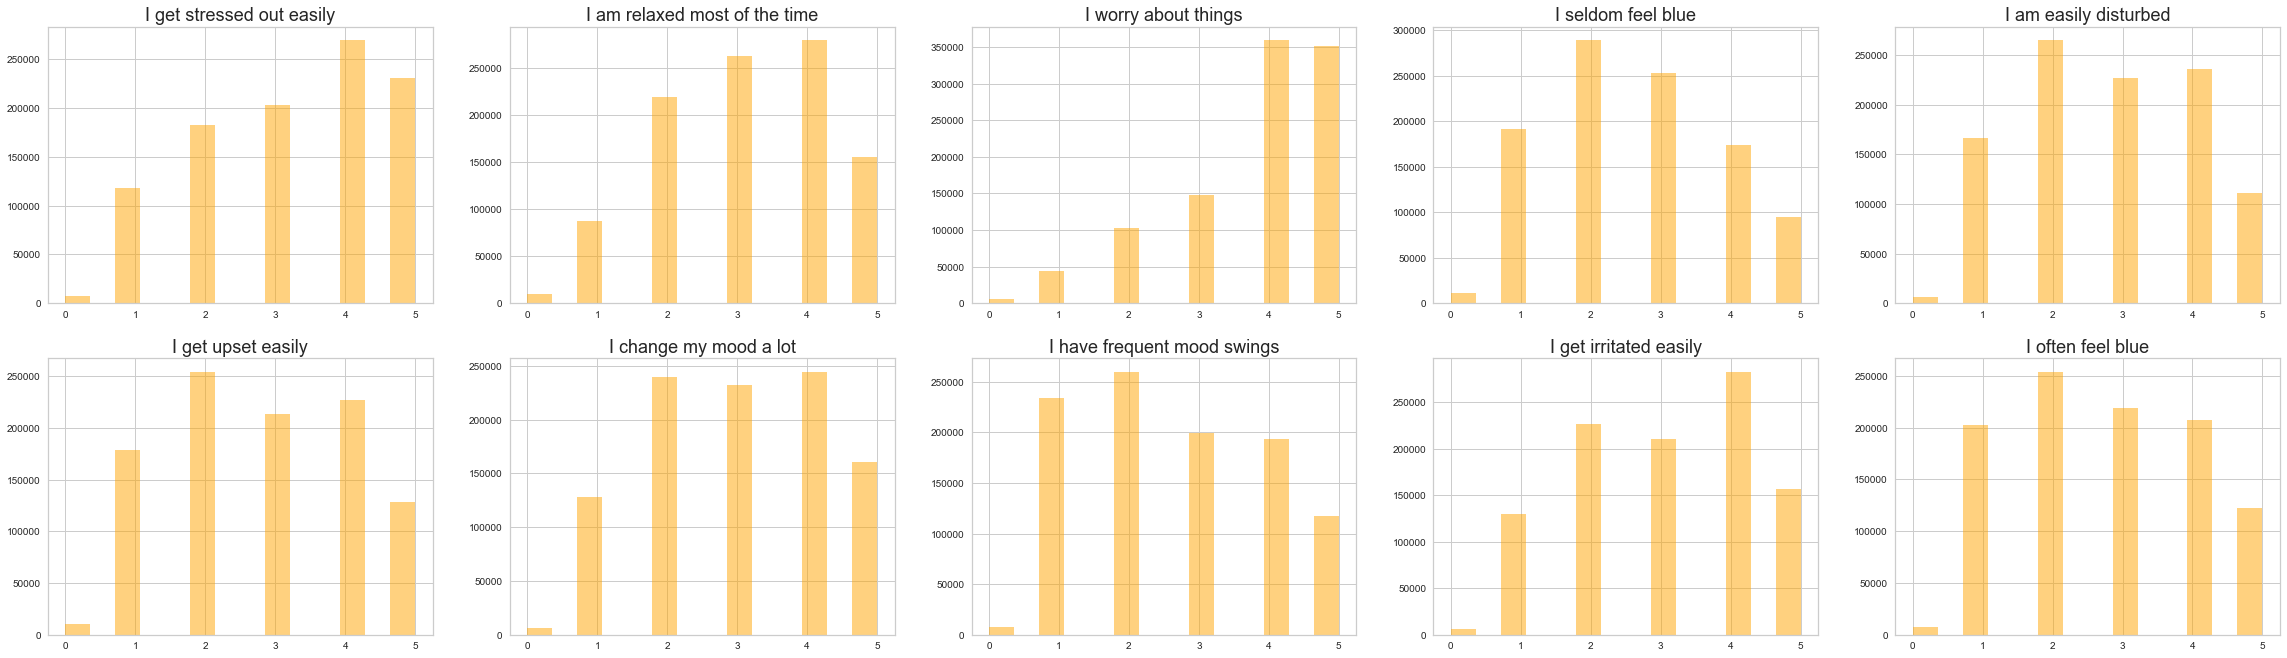

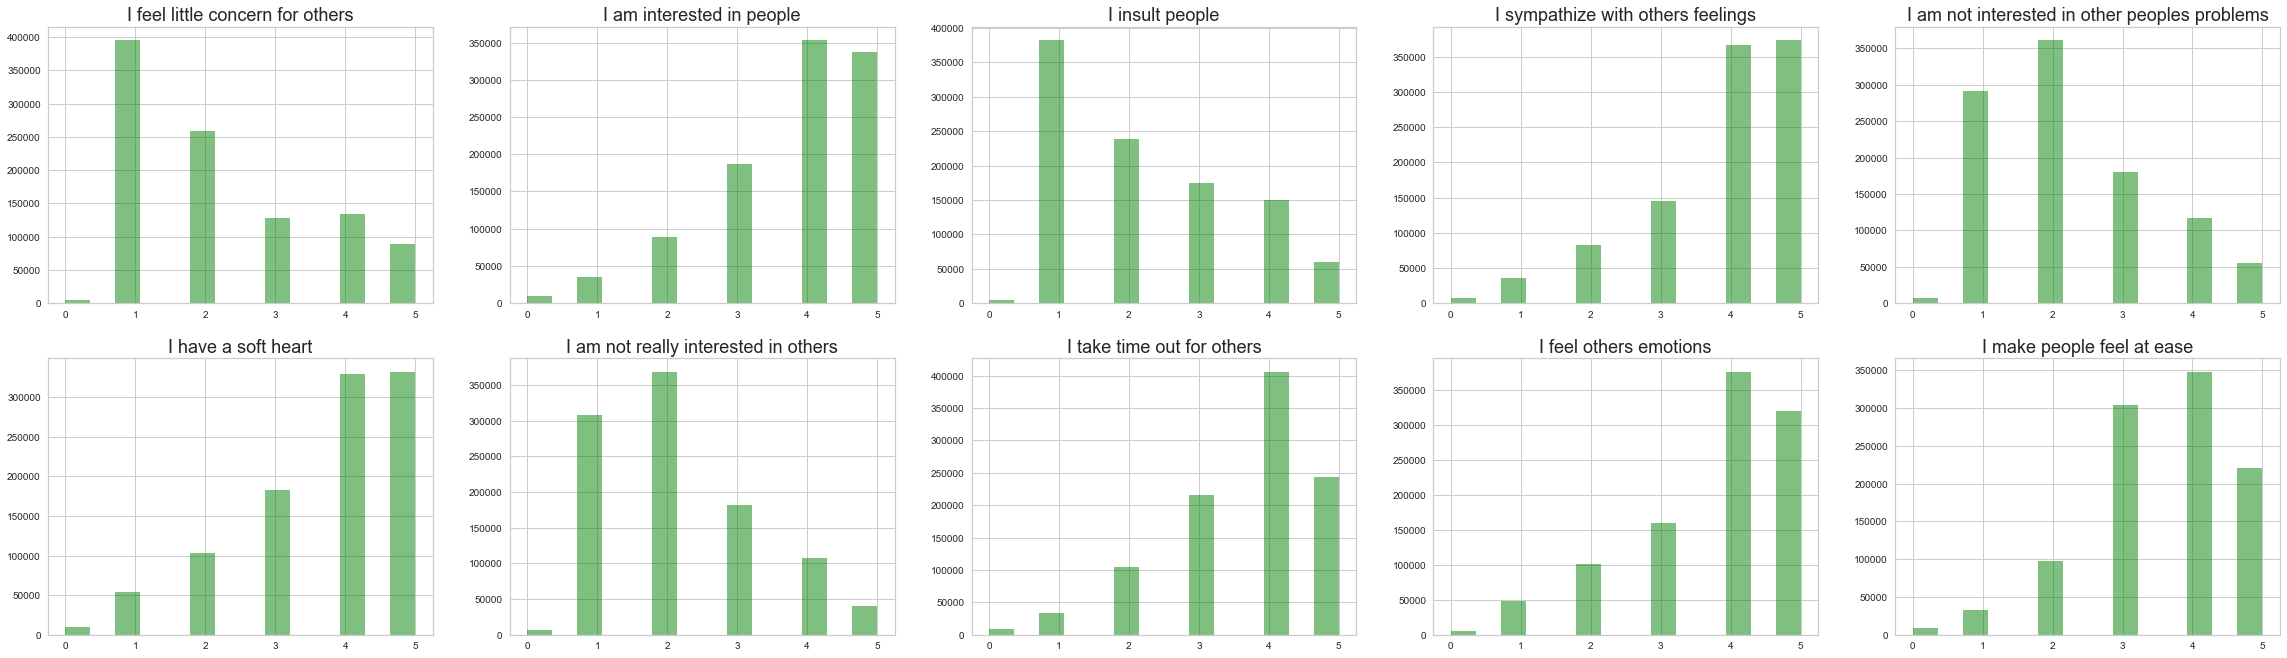

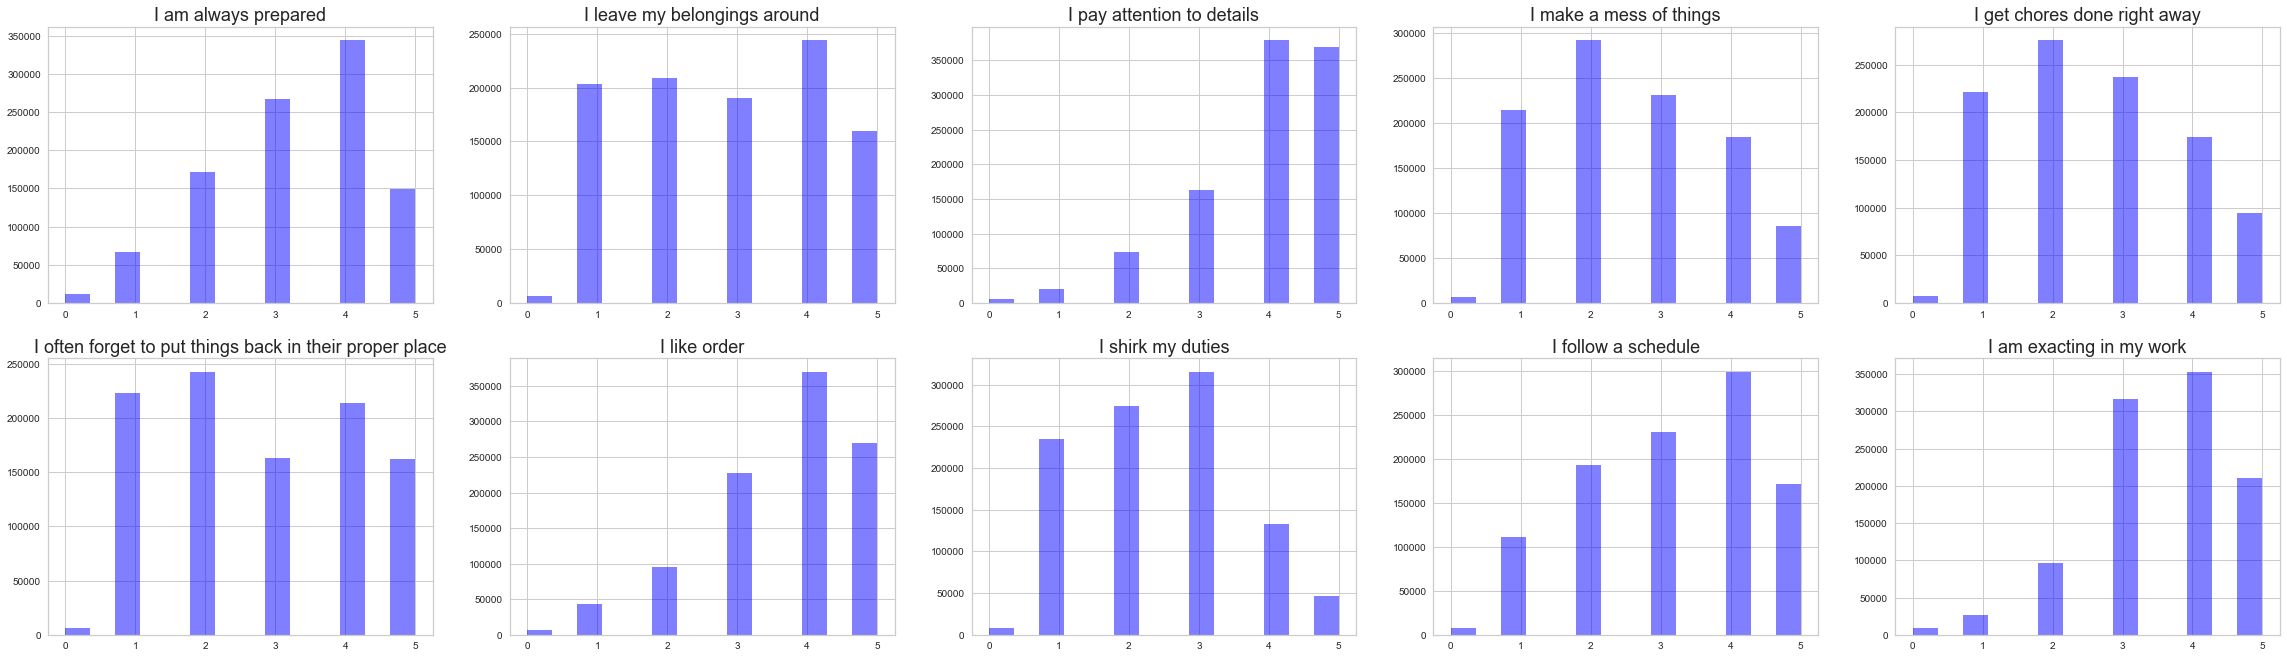

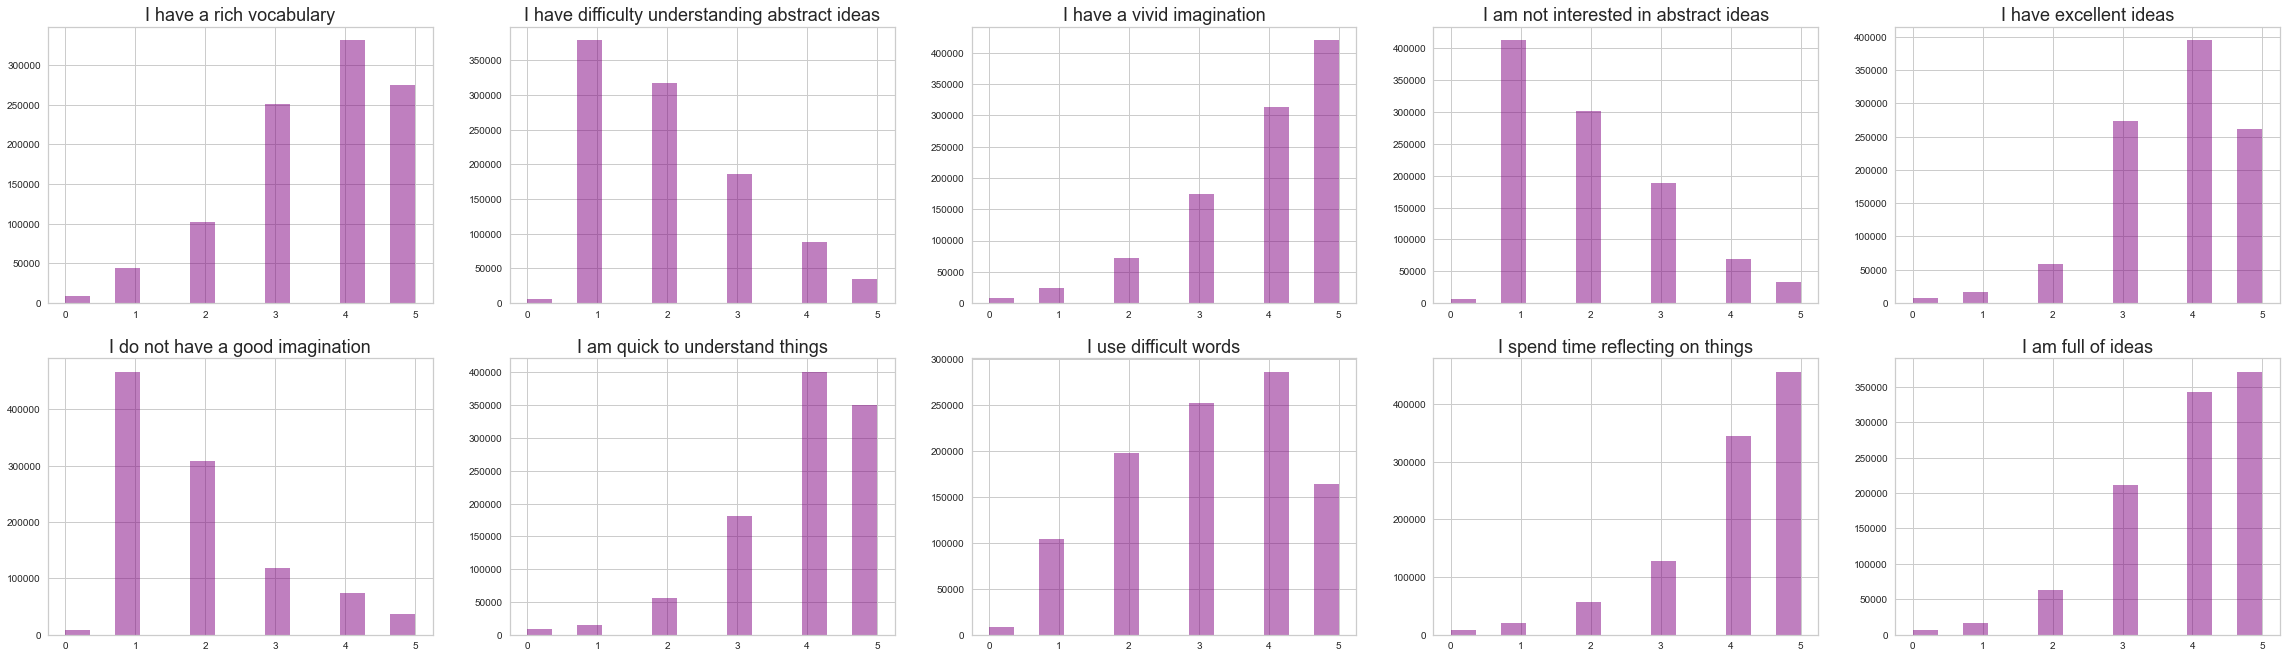

In [118]:
colors = ['red', 'orange', 'green', 'blue', 'purple']
i = 0
for cat in [ext_questions, est_questions, agr_questions, csn_questions, opn_questions]: # Returs a dictionary
    plt.figure(figsize=(40,60))
    j = 1
    for question_key in cat:
        plt.subplot(10, 5, j)
        plt.hist(df[question_key], bins=14, color=colors[i], alpha=.5)
        plt.title(cat[question_key], fontsize=18)
        j += 1
    i += 1

<a id='ml'></a>
## 5. Machine Learning Insights

The title of this study suggest there are 5 key personality traits. We will now see that this number of groups actually makes sense based on the metrics in this questionaire. But first, to ease the computational power required by our computer, let's scale down the numerical values such that they lie in the range  $[0,1]$.

In [119]:
df.drop(columns=['dateload', 'country', 'lat_appx_lots_of_err', 'long_appx_lots_of_err'], axis=1, inplace=True)
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(df)

In [120]:
df_questions = pd.DataFrame(X, columns=list(df.columns))[ext + est + agr + csn + opn]

### 5.1. Clustering

To find the optimal number of clusters in our clustering of the dataset, we will apply the elbow method. In short, the elbow method plots the sum $S$ of all distances squared, between the datapoints and its corresponding cluster centroid with respect to $k$-clusters. The sum $S\to 0$ as $k\to\text{len(df)}$, since all entries will be its own centroid when $k=\text{len(df)}$. Our task is to choose $k$ where the curve starts to flatten out - at its elbow. We can use the yellowbrick library to visualize this process, and we will now see that $k=5$ is a good choice for grouping the different personality traits.

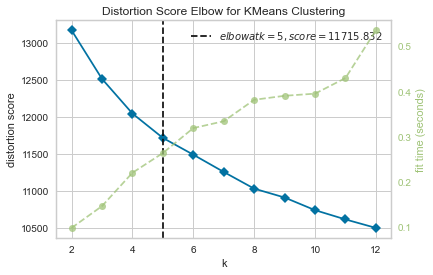

In [131]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,13))
visualizer.fit(df_questions.sample(5000))
visualizer.poof()

Indeed, by running this plot on different samples of our dataset, we see that the curve starts to flatten when $5\leq k\leq 6$. Thus, we choos $k=5$ when we now start to cluster our data.

In [132]:
# Fit data to 5 clusters
model = KMeans(n_clusters=5).fit(df_questions)

In [133]:
# Labeling the enteries in our dataset
df_questions['label'] = model.labels_

Since our dataset has over 100 dimensions, we need to apply PCA to visualize the clusters in 2 dimensions:

In [134]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_questions)
df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = df_questions.label

Text(0.5, 1.0, 'Personality Clusters')

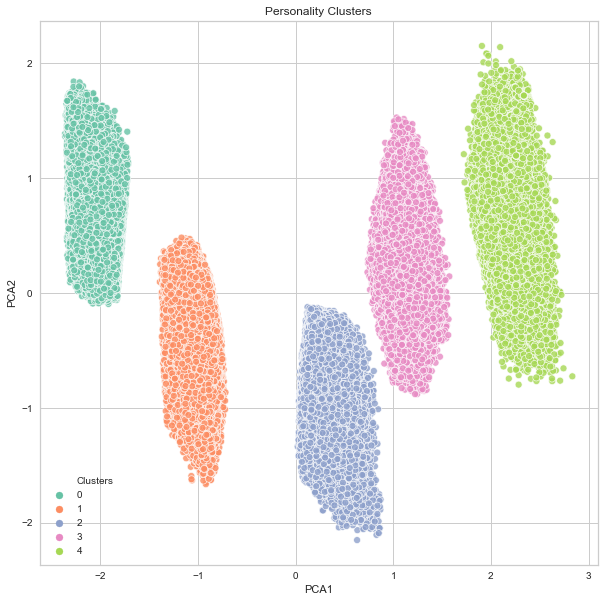

In [135]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters')

We have the following distribution of personalities:

Text(0.5, 1.0, 'Distributions of personalities')

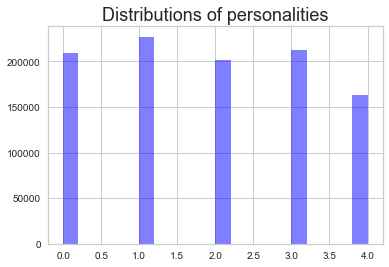

In [145]:
plt.hist(df_questions.label, bins=20, color='blue', alpha=.5)
plt.title('Distributions of personalities', fontsize=18)

### 5.2. Differentiating the personalities

In [169]:
# TODO: This section is wired....

In [150]:
data_sums = pd.DataFrame()
data_sums['extroversion'] = df[ext].sum(axis=1)/10
data_sums['neurotic'] = df[est].sum(axis=1)/10
data_sums['agreeable'] = df[agr].sum(axis=1)/10
data_sums['conscientious'] = df[csn].sum(axis=1)/10
data_sums['open'] = df[opn].sum(axis=1)/10
data_sums['labels'] = df_questions.label
dataclusters = data_sums.groupby('labels').mean()

In [165]:
dataclusters=dataclusters-3

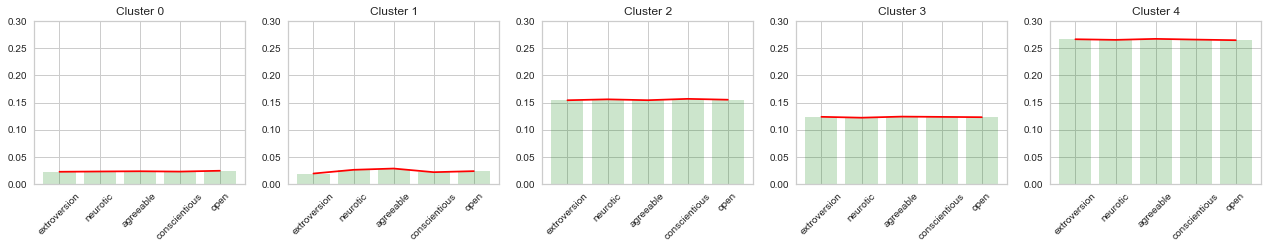

In [168]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,0.3);